# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
### The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
 
3. Also, determine the optimal value of lambda for ridge and lasso regression.

## The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation



## Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')



## Data understanding and Exploration

### Data Understanding

In [127]:
# reading the dataset
df = pd.read_csv("train.csv")

In [128]:
# summary of the dataset: 
(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So the data has 1460 rows and 81 columns

In [130]:
#a glance at dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
#statistical insight
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [132]:
# seeing null values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Summary:
There are 1460 rows and 81 columns in dataframe  
The columns of data comprises of both categorical values and numeric value  
Also the data is not clean - it has missing values.

### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.
We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [133]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### There are 38 columns having numeric values

In [134]:
#visualize better- correlation matrix and Heat map

# correlation matrix
cor = df_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


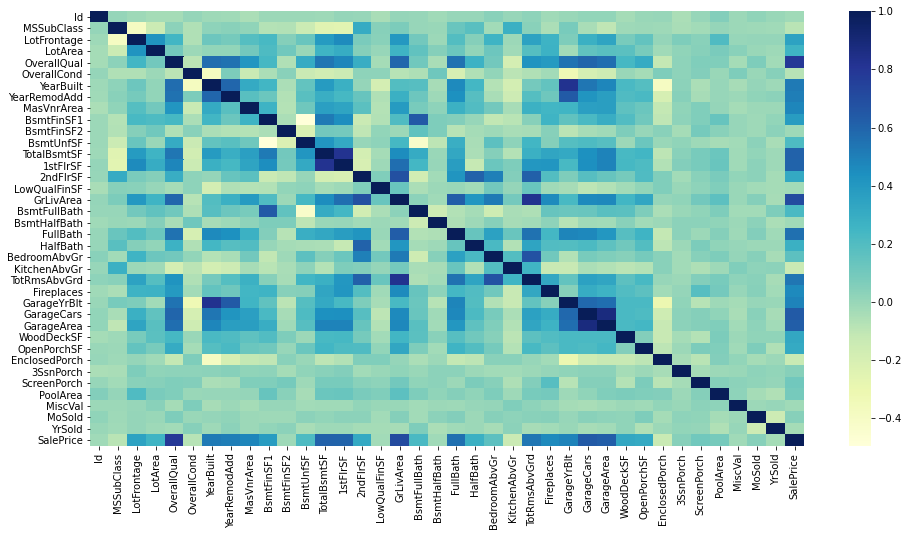

In [135]:
# correlation heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()



### It can be seen from this heat map that SalePrice is having very high positive correlation with OverallQual, GrLivArea,  GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF.  

Other variables are also showing good correlation.

## Data Cleaning

Data cleanin for missing value imputation, removing duplicate data and other kinds of data redundancies, etc
As we have seen there are missing values and some columns (eg. Id) which are of no use so need to remove them. 

In [136]:
#'Id' is just an identifier with no predictive power. Drop this column
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1460, 80)


In [137]:
#percentage of null values (non zero) in differend columns
col_list = list(df)
null = []
for i in df.isnull().sum()*100/df.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,17.739726
5,Alley,93.767123
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493


#### Alley, FireplaceQu, PoolQC, Fence , MiscFeature has very high NAN values, so better to remove them   

#### Also we can see the missing values in Garage Parameters (Type, finish, yrbuild, Qual, condition) are 5.547945 (same) so it seems like No Garage is there.

#### Keenly observing basement also seems like, if there is no basement then NAN is assigned

In [138]:
# drop the columns with NAN Alley, FireplaceQu, PoolQC, Fence , MiscFeature
df_dropped = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
df_dropped.shape

(1460, 75)

In [139]:
df_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [140]:
# NAN in 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' replaced to No Garage.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_dropped[col].fillna('No Garage', inplace=True)
    df_dropped['GarageYrBlt'].fillna(0, inplace=True)

In [141]:
#replacing NAN basement parameters 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' t
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_dropped[col].fillna('No Basement', inplace=True)

In [142]:
#now lets check the % of null values again
col_list = list(df_dropped)
null = []
for i in df_dropped.isnull().sum()*100/df_dropped.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,17.739726
23,MasVnrType,0.547945
24,MasVnrArea,0.547945
40,Electrical,0.068493


#### Only LotFrontage has significant null values now
#### Its important to determine whether this column is important or not
if its not important then we can drop it


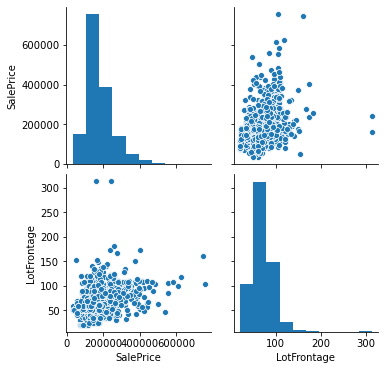

In [143]:
#LotFrontage relatio with Sale price
sns.pairplot(df_dropped[['SalePrice','LotFrontage']])

### Seems like it has a good linear kind of relation, not so random. So replace NAN with Median

In [144]:
df_dropped.loc[:,'LotFrontage'] = df_dropped.loc[:, 'LotFrontage'].fillna(df_dropped['LotFrontage'].median())

In [145]:
#now lets check the % of null values again
col_list = list(df_dropped)
null = []
for i in df_dropped.isnull().sum()*100/df_dropped.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
23,MasVnrType,0.547945
24,MasVnrArea,0.547945
40,Electrical,0.068493


In [146]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
df_dropped.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(df_dropped.shape)
print(((df_dropped.isnull().sum()/df_dropped.shape[0])*100).round(2))

(1451, 75)
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
Fu

In [147]:
#now lets check the % of null values again
col_list = list(df_dropped)
null = []
for i in df_dropped.isnull().sum()*100/df_dropped.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null


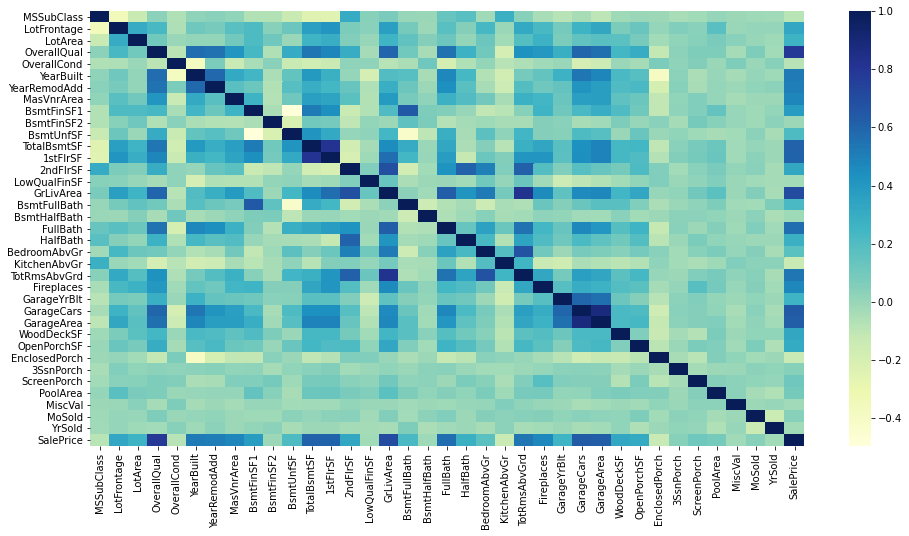

In [148]:
#correlation map after cleaning

df_numeric_cleaned = df_dropped.select_dtypes(include=['float64', 'int64'])
corr = df_numeric_cleaned.corr()
# correlation heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=False)
plt.show()



## Derived features

In [149]:
import datetime
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df_dropped['DiffYearBuilt'] = pd.datetime.now().year - df_dropped['YearBuilt']
df_dropped['DiffYearRemodAdd'] = pd.datetime.now().year - df_dropped['YearRemodAdd']
df_dropped['DiffGarageYrBlt'] = pd.datetime.now().year - df_dropped['GarageYrBlt']

In [150]:
df_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,18,18,18.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,45,45,45.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,20,19,20.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,106,51,23.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,21,21,21.0


In [151]:
#Making list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

## Dummies

In [152]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[NonNumCols], drop_first=True)

In [153]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1451, 283)

In [154]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1451, 245)

In [155]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


## Data Preparation for Modelling

In [156]:
df_data = df_final

In [157]:
# Preparing Test and Train Set

X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']


from sklearn.model_selection import train_test_split

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1015, 244)
X_test Shape: (436, 244)
y_train Shape: (1015,)
y_test Shape: (436,)


In [159]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [160]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1074063.5772188678
[ 1.78881225e+01  1.03242350e+02  8.38500876e-01  7.11193992e+03
  5.52177441e+03  1.33418353e+02  4.34299015e+01  1.85078194e+01
  2.12595372e+01  4.23382733e+00  5.05503214e-01  2.59981048e+01
  2.33115603e+01  4.81159786e+01 -3.82752614e+01  3.31529988e+01
  1.00465843e+03 -6.80865266e+03  4.20022281e+02  2.34014319e+02
 -4.17290716e+03 -1.74133574e+04 -5.17888669e+02  4.00013259e+02
  6.88869656e+01  8.46048657e+03 -6.03587861e+00  9.17870032e+00
  3.30062928e+00 -4.16263534e+00  2.93860230e+01  3.68860313e+00
  9.04370748e+01  7.71425702e-01  6.34382556e+01 -1.22852190e+02
 -1.33418441e+02 -4.34296240e+01 -6.88870077e+01  4.82792000e+04
  4.28973145e+04  4.09593559e+04  2.83915939e+04  2.96300723e+04
  2.25332458e+03 -4.38839051e+03 -5.59778223e+01  1.53999726e+03
 -1.00830721e+04  2.52961638e+03 -9.10715192e+02  8.28487519e+03
 -6.37673892e+03 -2.42907865e+04 -1.34777764e+03  3.35163869e+03
 -5.10826653e+04  1.21536516e+04  1.50353560e+04  1.91196559e+04
 -7.2

In [161]:
from sklearn.metrics import r2_score, mean_squared_error

In [162]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.945708732659247
0.5617741333398785
345184105343.3229
1209832739374.1575
340082862.40721464
2774845732.5095353


### Linear Regression Model is performing well on Train dataset - R_square of 0.94 but on test dataset it is not performing well. Seems like the Model is overfitted (high variance, low bias).    

### We can use regularization with a optimal lamda value to reduce the overfitting, slight compromising on bias but significant reduction in variance.

## *Ridge and Lasso Regression*
Let's now try predicting prices, a dataset used in simple linear regression, to perform ridge and lasso regression.


## Scaling 

In [163]:
# scaling the features - necessary before using Ridge or Lasso

from sklearn.preprocessing import StandardScaler

#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
scaler = StandardScaler()
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.298599,-0.513865,-1.552452,1.293141,-1.872354,0.238209,-0.562965,-0.502945,-0.297804,...,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.041883,-0.315476,-0.824292,-0.538734,0.236493,-0.301373,-0.562965,1.097605,-0.297804,...,0,0,0,0,1,0,0,0,1,0
1181,1.508340,-0.258558,-0.443913,1.360189,-0.538734,1.207232,1.121161,0.447197,2.249743,-0.297804,...,0,0,1,0,0,0,0,0,0,1
808,0.548788,0.651477,0.250537,-0.824292,-0.538734,-0.198666,-0.939061,5.123271,0.181472,0.484095,...,0,0,0,0,1,0,0,0,1,0
1095,-0.890540,0.348132,-0.112376,-0.096131,-0.538734,1.140284,1.023055,-0.562965,-0.874119,-0.297804,...,0,0,0,0,1,0,0,0,1,0


In [164]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-1.125258,-0.565062,-0.824292,-0.538734,0.136072,-0.448532,-0.562965,0.949564,-0.297804,...,0,0,0,0,1,0,0,0,1,0
824,-0.890540,0.478137,0.056414,1.360189,-0.538734,1.140284,1.023055,-0.562965,-0.925611,-0.297804,...,0,0,1,0,0,0,0,0,0,1
369,-0.890540,-0.041883,-0.066779,-0.824292,1.293141,-0.432982,1.023055,-0.562965,-0.771134,1.278212,...,0,0,0,0,1,0,0,0,1,0
291,3.187555,-0.648573,-0.435025,-0.824292,0.377204,-2.006249,0.728738,-0.562965,-0.475054,-0.297804,...,0,0,0,0,1,0,0,0,1,0
134,-0.890540,0.348132,-0.021893,-0.824292,0.377204,-0.131718,0.385367,-0.562965,0.297330,-0.297804,...,0,0,0,0,1,0,0,0,1,0


## Ridge Regression

In [165]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020076,0.003979,0.009840,0.001676,0.0001,{'alpha': 0.0001},-24498.185261,-16076.610234,-21981.193131,-21396.741974,...,-21066.786135,2746.642409,27,-11459.408385,-12783.533185,-12268.640772,-12502.136967,-11336.572436,-12070.058349,573.771420
1,0.018155,0.008233,0.008191,0.002908,0.001,{'alpha': 0.001},-24492.476163,-16038.146029,-21906.924769,-21320.189348,...,-21019.051508,2751.527725,26,-11459.255427,-12779.878167,-12259.322803,-12502.044639,-11333.259399,-12066.752087,573.092595
2,0.010858,0.000056,0.005367,0.000388,0.01,{'alpha': 0.01},-24439.574956,-15929.931539,-21305.030156,-20766.584682,...,-20720.943359,2732.076010,25,-11458.657500,-12850.290922,-12281.601085,-12584.727098,-11411.491585,-12117.353638,585.616611
3,0.010840,0.000194,0.005431,0.000239,0.05,{'alpha': 0.05},-24259.986476,-16783.513730,-20229.454977,-20538.840856,...,-20614.795791,2389.121351,21,-11475.347489,-13589.114867,-12864.438579,-13271.268680,-12237.261887,-12687.486301,755.914091
4,0.011191,0.000443,0.004985,0.000102,0.1,{'alpha': 0.1},-24096.047105,-17376.420477,-19892.225837,-20656.749826,...,-20693.032357,2181.126360,23,-11504.214286,-14185.938393,-13444.775656,-13813.002321,-12910.237624,-13171.633656,934.172324


In [167]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [168]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.61007410e+03 -2.40678519e+03  4.13637449e+03  1.79046146e+04
  5.58419839e+03  2.07519023e+03  9.90016869e+02  5.03727343e+03
  9.92336833e+02 -1.28854584e+02  2.18167600e+02  1.20798126e+03
  6.07743210e+03  8.88686690e+03  8.42882525e+01  1.16947034e+04
  4.82537858e+03 -5.82277450e+02  3.30257865e+03  2.72869736e+03
 -1.34834492e+03 -3.52397764e+03  6.37597144e+03  3.14620338e+03
 -1.11970027e+03  1.09806089e+04  1.22989703e+02  2.77899614e+03
 -8.15225980e+02  9.19457241e+02  1.53959383e+03  2.20411650e+03
  7.81442245e+02 -9.28982356e+02  6.26542261e+02 -3.76420928e+02
 -2.07519023e+03 -9.90016869e+02  1.11970027e+03  2.51864582e+03
  1.16423913e+03  3.37555373e+03 -3.61070959e+03  2.43902415e+03
  3.47029003e+03 -4.80732012e+03 -1.87802963e+03  5.97082280e+03
  1.35332119e+03  6.00483210e+03 -7.72053543e+02  4.31093176e+03
 -2.67724948e+03 -7.17455436e+02 -1.29695210e+03  3.35338158e+03
 -5.89534207e+02 -4.59071381e+02 -3.02060350e+02  3.64376353e+03
 -7.63091328e+02 -3.62195

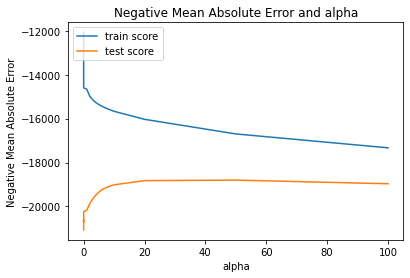

In [169]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [170]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8685162849411042
0.8615386367951177
835974011528.6069
382257422685.55786
823619715.791731
876737207.9943987


### After Ridge Regression there is a significant increase in the R_square value for test dataset. Model is performing equally well for both training and test dataset 
#### R square training = 0.8685162849411042
#### R square test = 0.8615386367951177

## Lasso Regression

In [172]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   47.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.262752,0.047309,0.006086,0.000902,0.0001,{'alpha': 0.0001},-24428.974784,-13763.771860,-22076.503315,-21427.072558,...,-20602.347824,3599.193451,27,-11463.379044,-12832.491696,-12283.996790,-12539.378399,-11331.498027,-12090.148791,593.101774
1,0.209509,0.008105,0.005054,0.000313,0.001,{'alpha': 0.001},-24428.463155,-13763.774928,-22074.535667,-21427.218359,...,-20601.727766,3598.898555,26,-11463.353136,-12832.483897,-12283.983993,-12539.367548,-11331.496659,-12090.137047,593.103168
2,0.210479,0.006668,0.005382,0.000324,0.01,{'alpha': 0.01},-24423.306273,-13763.805567,-22054.865657,-21428.683785,...,-20595.617850,3595.968142,25,-11463.234335,-12832.466829,-12283.930426,-12539.330052,-11331.587467,-12090.109822,593.091596
3,0.210074,0.007200,0.004942,0.000078,0.05,{'alpha': 0.05},-24417.916904,-13763.941228,-21967.576770,-21424.218103,...,-20573.284714,3587.036472,24,-11463.351277,-12832.834685,-12283.762889,-12539.366863,-11332.174646,-12090.298072,593.003448
4,0.290874,0.072729,0.006980,0.001423,0.1,{'alpha': 0.1},-24412.180431,-13764.429343,-21858.806178,-21409.040618,...,-20545.337021,3576.237719,23,-11463.817226,-12833.563595,-12283.841317,-12539.710372,-11332.983025,-12090.783107,592.937972


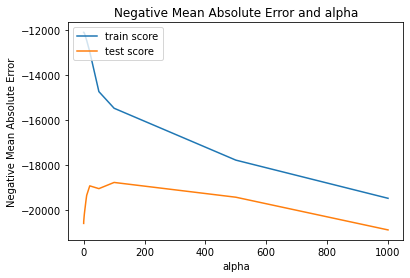

In [174]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [175]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [176]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [177]:
lasso.coef_

array([-6.19453863e+03, -2.39897365e+03,  5.01338413e+03,  1.56038713e+04,
        5.90920105e+03,  4.04133632e+03,  1.19499400e+03,  3.40402524e+03,
        0.00000000e+00, -2.33314535e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.79889424e+03, -9.12271615e+02,  2.51399691e+04,
        5.06896205e+03, -8.80757599e+01,  2.80613650e+03,  1.69600552e+03,
       -1.44954045e+03, -3.53406289e+03,  4.34138847e+03,  1.82856698e+03,
       -1.01816009e+02,  1.22209088e+04, -3.15789810e+03,  2.12744699e+03,
       -0.00000000e+00,  5.24546423e+02,  1.36972678e+03,  1.76132558e+03,
        7.66064983e+02, -7.31132601e+02,  3.38008547e+02, -2.52658346e+02,
       -1.08544120e+03, -1.02563328e+02,  2.05147610e+03,  1.40282195e+03,
        0.00000000e+00,  2.07913089e+03, -4.59369909e+03,  7.78721609e+03,
        2.68674645e+03, -2.08525982e+04, -1.38448282e+03,  1.23989347e+04,
        2.77537947e+03,  1.04678882e+04, -0.00000000e+00,  7.69454782e+03,
       -4.29527878e+03, -

In [178]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8983072664388432
0.8666679372179392
646562826281.1877
368096698607.56055
637007710.6218598
844258483.0448636


### Lasso Regularization is also performing very well for the this model. The R square for test data set has rised significantly to 0.86 from 0.56 (Linear regression). 

#### R square for train dataset = 0.8983072664388432
#### R square for test dataset = 0.8666679372179392

In [179]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.457087e-01,8.685163e-01,8.983073e-01
1,R2 Score (Test),5.617741e-01,8.615386e-01,8.666679e-01
2,RSS (Train),3.451841e+11,8.359740e+11,6.465628e+11
3,RSS (Test),1.209833e+12,3.822574e+11,3.680967e+11
4,MSE (Train),1.844134e+04,2.869878e+04,2.523901e+04
5,MSE (Test),5.267680e+04,2.960975e+04,2.905613e+04


### Lets observe the changes in the coefficients after regularization

In [180]:
betas = pd.DataFrame(index=X.columns)

In [181]:
betas.rows = X.columns

In [184]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(200)

,Linear,Ridge,Lasso
MSSubClass,1.788812e+01,-5610.074096,-6194.538627
LotFrontage,1.032423e+02,-2406.785194,-2398.973647
LotArea,8.385009e-01,4136.374490,5013.384132
OverallQual,7.111940e+03,17904.614629,15603.871289
OverallCond,5.521774e+03,5584.198392,5909.201051
YearBuilt,1.334184e+02,2075.190233,4041.336317
YearRemodAdd,4.342990e+01,990.016869,1194.994003
MasVnrArea,1.850782e+01,5037.273431,3404.025243
BsmtFinSF1,2.125954e+01,992.336833,0.000000
BsmtFinSF2,4.233827e+00,-128.854584,-233.314535


## Conclusion 

### Based on these two regularization model, we can enlist Top Features which has most impact on Sale Price. 
### Company must look for these parameters while investing as these houses can generate more profit for company.

#### The Top features are

1. GrLivArea: Above grade (ground) living area square feet
2. OverallQual: Rates the overall material and finish of the house
3. Condition2_PosN	Near positive off-site feature--park, greenbelt, etc.
4. Conditon1_Norm	Normal
5. RoofMatl: Roof material -> CompShg -Standard (Composite) Shingle
6. RoofMatl: Roof material -> WdShngl	Wood Shingles
7. LandContour: Flatness of the property - HLS	Hillside - Significant slope from side to side
8. Lvl	Near Flat/Level	
9. GarageCars: Size of garage in car capacity
10. HouseStyle: Style of dwelling 1Story	One story
11. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
12. LotArea: Lot size in square feet
13. LotConfig: Lot configuration -> CulDSac	Cul-de-sac
14. BsmtFullBath: Basement full bathrooms




These Neighbourhoods has good positive relation with Sales Price
1. Crawford
2. Northridge
3. Edwards
4. Brookside
5. Northridge Heights
6. Stone Brook





### These Features has negative correlation with Sales_Price so company should be aware of these
1. Condition1: Proximity to various conditions --> Feedr	Adjacent to feeder street
2. LotshapeIR3 - Irregular Lot shape
3. KitchenQualTA: Kitchen quality - Typical/Average
4. BsmtExposure: Refers to walkout or garden level walls -> No basement 
5. Exterior2nd: Exterior covering on house --> Stucco

And the Neighbourhood Edwards has negative impact on sale price. 



##  Optimal value of lambda for ridge and lasso regression

### For Ridge lambda optimal is 50

### For Lasso ambda optimal is 100